# PSYLIQ PYTHON INTERNSHIP

Titanic Classification:

Question- How can I predict the stock price of a company using LSTM in a jupyter notebook?

# NAME: ZAGADE MEGHA BHARAT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    zero_one_loss, 
    accuracy_score, 
    f1_score,
    confusion_matrix, 
    ConfusionMatrixDisplay, 
    classification_report,
    precision_score,
    recall_score
)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel("Titanic_dataset.xlsx")
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [3]:
df.shape

(1309, 14)

In [4]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [5]:
df=df.drop(["name","ticket","cabin","boat","body","home.dest"], axis=1)
df

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,1,0,female,2.0000,1,2,151.5500,S
3,1,0,male,30.0000,1,2,151.5500,S
4,1,0,female,25.0000,1,2,151.5500,S
...,...,...,...,...,...,...,...,...
1304,3,0,female,14.5000,1,0,14.4542,C
1305,3,0,female,NaN,1,0,14.4542,C
1306,3,0,male,26.5000,0,0,7.2250,C
1307,3,0,male,27.0000,0,0,7.2250,C


In [6]:
suv=df["survived"]
df=df.drop(["survived"],axis =1)
df

,pclass,sex,age,sibsp,parch,fare,embarked
0,1,female,29.0000,0,0,211.3375,S
1,1,male,0.9167,1,2,151.5500,S
2,1,female,2.0000,1,2,151.5500,S
3,1,male,30.0000,1,2,151.5500,S
4,1,female,25.0000,1,2,151.5500,S
...,...,...,...,...,...,...,...
1304,3,female,14.5000,1,0,14.4542,C
1305,3,female,NaN,1,0,14.4542,C
1306,3,male,26.5000,0,0,7.2250,C
1307,3,male,27.0000,0,0,7.2250,C


In [7]:
df=pd.concat([df,suv],axis=1)
df

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,1,female,29.0000,0,0,211.3375,S,1
1,1,male,0.9167,1,2,151.5500,S,1
2,1,female,2.0000,1,2,151.5500,S,0
3,1,male,30.0000,1,2,151.5500,S,0
4,1,female,25.0000,1,2,151.5500,S,0
...,...,...,...,...,...,...,...,...
1304,3,female,14.5000,1,0,14.4542,C,0
1305,3,female,NaN,1,0,14.4542,C,0
1306,3,male,26.5000,0,0,7.2250,C,0
1307,3,male,27.0000,0,0,7.2250,C,0


In [8]:
df.age.value_counts()

age
24.0000    47
22.0000    43
21.0000    41
30.0000    40
18.0000    39
           ..
0.3333      1
22.5000     1
70.5000     1
0.6667      1
26.5000     1
Name: count, Length: 98, dtype: int64

In [9]:
df.fare.value_counts()

fare
8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
15.0500     1
9.6875      1
15.5792     1
12.0000     1
7.8750      1
Name: count, Length: 281, dtype: int64

In [10]:
df.embarked.value_counts()

embarked
S    914
C    270
Q    123
Name: count, dtype: int64

In [11]:
df.isnull().sum()

pclass        0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      2
survived      0
dtype: int64

In [12]:
#Fill up Null value by mode
df['age'] = df['age'].fillna(df['age'].mode()[0])
df['fare'] = df['fare'].fillna(df['fare'].mode()[0])
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

In [13]:
df

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,1,female,29.0000,0,0,211.3375,S,1
1,1,male,0.9167,1,2,151.5500,S,1
2,1,female,2.0000,1,2,151.5500,S,0
3,1,male,30.0000,1,2,151.5500,S,0
4,1,female,25.0000,1,2,151.5500,S,0
...,...,...,...,...,...,...,...,...
1304,3,female,14.5000,1,0,14.4542,C,0
1305,3,female,24.0000,1,0,14.4542,C,0
1306,3,male,26.5000,0,0,7.2250,C,0
1307,3,male,27.0000,0,0,7.2250,C,0


In [14]:
df.age.value_counts()

age
24.0000    310
22.0000     43
21.0000     41
30.0000     40
18.0000     39
          ... 
0.3333       1
22.5000      1
70.5000      1
0.6667       1
26.5000      1
Name: count, Length: 98, dtype: int64

In [15]:
df.parch.value_counts()

parch
0    1002
1     170
2     113
3       8
4       6
5       6
6       2
9       2
Name: count, dtype: int64

In [16]:
df.fare.value_counts()

fare
8.0500     61
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
15.0500     1
9.6875      1
15.5792     1
12.0000     1
7.8750      1
Name: count, Length: 281, dtype: int64

In [17]:
df.isnull().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
survived    0
dtype: int64

# Data visualisation

<Axes: >

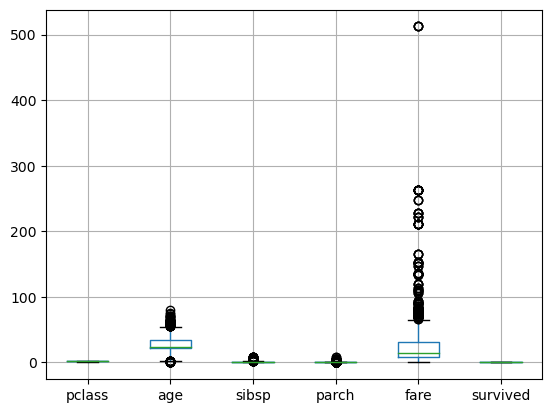

In [18]:
df.boxplot()

In [19]:
df.age.value_counts()

age
24.0000    310
22.0000     43
21.0000     41
30.0000     40
18.0000     39
          ... 
0.3333       1
22.5000      1
70.5000      1
0.6667       1
26.5000      1
Name: count, Length: 98, dtype: int64

In [20]:
import seaborn as sns

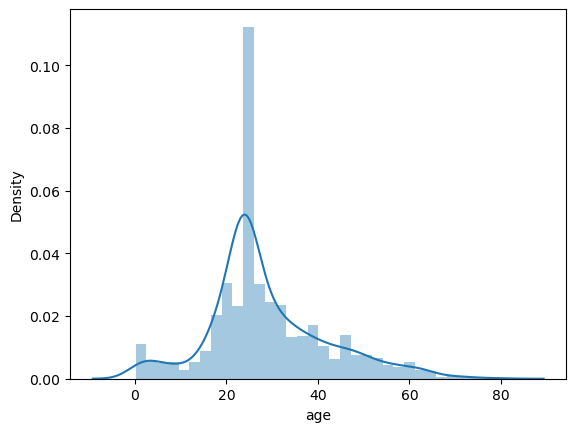

In [21]:
sns.distplot(df['age'])
plt.show()

In [22]:
df.fare.value_counts()

fare
8.0500     61
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
15.0500     1
9.6875      1
15.5792     1
12.0000     1
7.8750      1
Name: count, Length: 281, dtype: int64

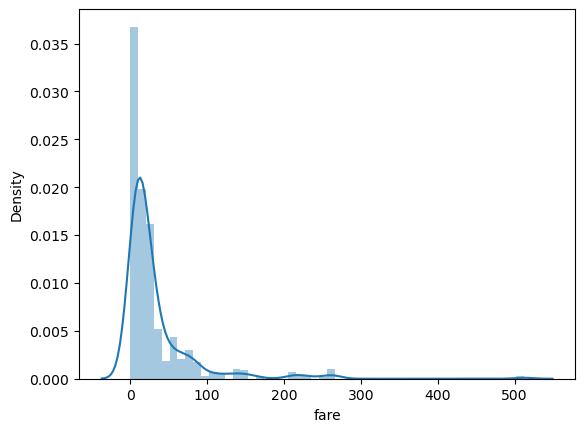

In [23]:
sns.distplot(df['fare'])
plt.show()

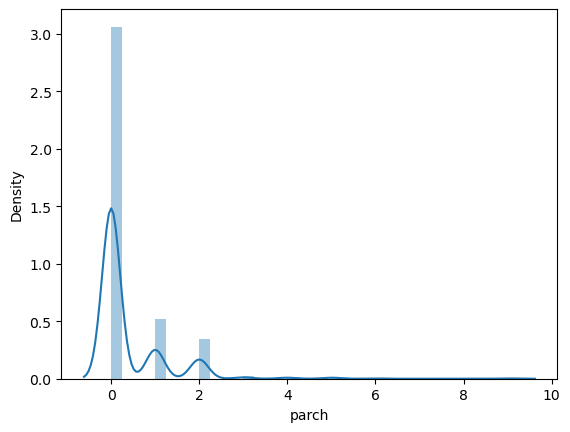

In [24]:
sns.distplot(df['parch'])
plt.show()

In [25]:
plt.hist(df.fare)

(array([1071.,  154.,   42.,    4.,   21.,   13.,    0.,    0.,    0.,
           4.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

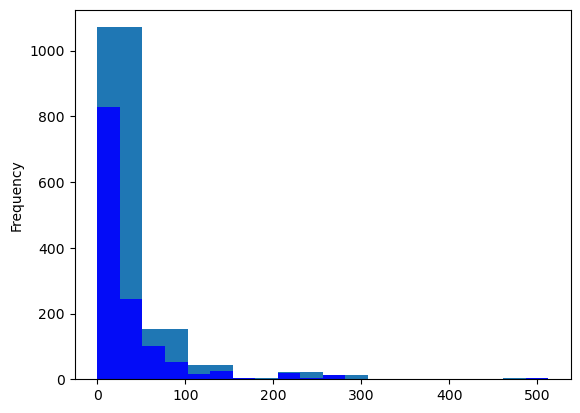

In [26]:
df['fare'].plot(kind='hist',color="blue",
                          alpha=0.9, bins=20)
plt.show()


In [27]:
#InterQuartile Range
IQR=df.fare.quantile(0.75)-df.fare.quantile(0.25)
IQR

23.379199999999997

In [28]:
#Upper bound and Lower bound
ub=df.fare.quantile(0.75)+(IQR*3)
lb=df.fare.quantile(0.25)-(IQR*3)
print(lb)
print(ub)

-62.24179999999999
101.4126


In [29]:
df.loc[df["fare"]>101.4126,"fare"]=101.4126

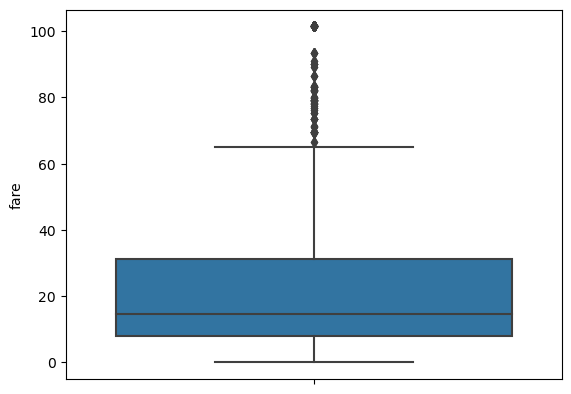

In [30]:
sns.boxplot(data=df, y="fare")
plt.show()

In [31]:
 #sibsq is discrete column therefore , we dont need to treat outlier
df.sibsp.value_counts()                 

sibsp
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: count, dtype: int64

In [32]:
df.age.describe()

count    1309.000000
mean       28.699516
std        13.097103
min         0.166700
25%        22.000000
50%        24.000000
75%        35.000000
max        80.000000
Name: age, dtype: float64

In [33]:
#Upper bound and Lower bound
ub=df["age"].mean()+3*df["age"].std()
lb=df["age"].mean()-3*df["age"].std()
print(lb)
print(ub)

-10.591791711437807
67.99082410257608


In [34]:
df.loc[df["age"]>73.1217,"age"]=73.1217

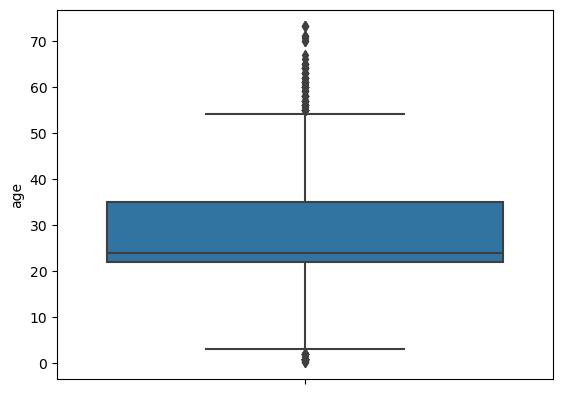

In [35]:
sns.boxplot(data=df,y="age")
plt.show()

In [36]:
iqr=df.parch.quantile(0.75)-df.parch.quantile(0.25)
iqr

0.0

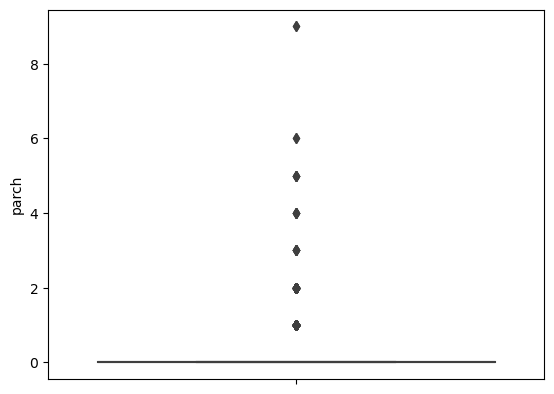

In [37]:
sns.boxplot(data=df,y="parch")
plt.show()

In [38]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['sex']= label_encoder.fit_transform(df['sex'])
df['embarked']= label_encoder.fit_transform(df['embarked'])

In [39]:
df

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,1,0,29.0000,0,0,101.4126,2,1
1,1,1,0.9167,1,2,101.4126,2,1
2,1,0,2.0000,1,2,101.4126,2,0
3,1,1,30.0000,1,2,101.4126,2,0
4,1,0,25.0000,1,2,101.4126,2,0
...,...,...,...,...,...,...,...,...
1304,3,0,14.5000,1,0,14.4542,0,0
1305,3,0,24.0000,1,0,14.4542,0,0
1306,3,1,26.5000,0,0,7.2250,0,0
1307,3,1,27.0000,0,0,7.2250,0,0


In [40]:
df.skew()

pclass     -0.598647
sex        -0.602189
age         0.669718
sibsp       3.844220
parch       3.669078
fare        1.564036
embarked   -1.127941
survived    0.486404
dtype: float64

In [41]:
df.loc[df["fare"]==0]

,pclass,sex,age,sibsp,parch,fare,embarked,survived
7,1,1,39.0,0,0,0.0,2,0
70,1,1,24.0,0,0,0.0,2,0
125,1,1,24.0,0,0,0.0,2,0
150,1,1,40.0,0,0,0.0,2,0
170,1,1,49.0,0,0,0.0,2,1
223,1,1,24.0,0,0,0.0,2,0
234,1,1,38.0,0,0,0.0,2,0
363,2,1,24.0,0,0,0.0,2,0
384,2,1,24.0,0,0,0.0,2,0
410,2,1,24.0,0,0,0.0,2,0


In [42]:
v=np.sqrt(df.fare)

In [43]:
v.skew()

0.9889188222176946

In [44]:
df.sibsp.value_counts()

sibsp
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: count, dtype: int64

In [45]:
df.shape

(1309, 8)

# Heatmap to find out Correlation

In [46]:
x=df.corr()
x

,pclass,sex,age,sibsp,parch,fare,embarked,survived
pclass,1.000000,0.124617,-0.397909,0.060832,0.018322,-0.709616,0.185479,-0.312469
sex,0.124617,1.000000,0.045251,-0.109609,-0.213125,-0.227995,0.097960,-0.528693
age,-0.397909,0.045251,1.000000,-0.186529,-0.113934,0.225461,-0.046986,-0.030738
sibsp,0.060832,-0.109609,-0.186529,1.000000,0.373587,0.262873,0.065567,-0.027825
parch,0.018322,-0.213125,-0.113934,0.373587,1.000000,0.267483,0.044772,0.082660
fare,-0.709616,-0.227995,0.225461,0.262873,0.267483,1.000000,-0.239505,0.296148
embarked,0.185479,0.097960,-0.046986,0.065567,0.044772,-0.239505,1.000000,-0.175313
survived,-0.312469,-0.528693,-0.030738,-0.027825,0.082660,0.296148,-0.175313,1.000000


In [47]:
plt.figure(figsize=(20,10))
heatmap=sns.heatmap(x,cmap="coolwarm",annot=True)

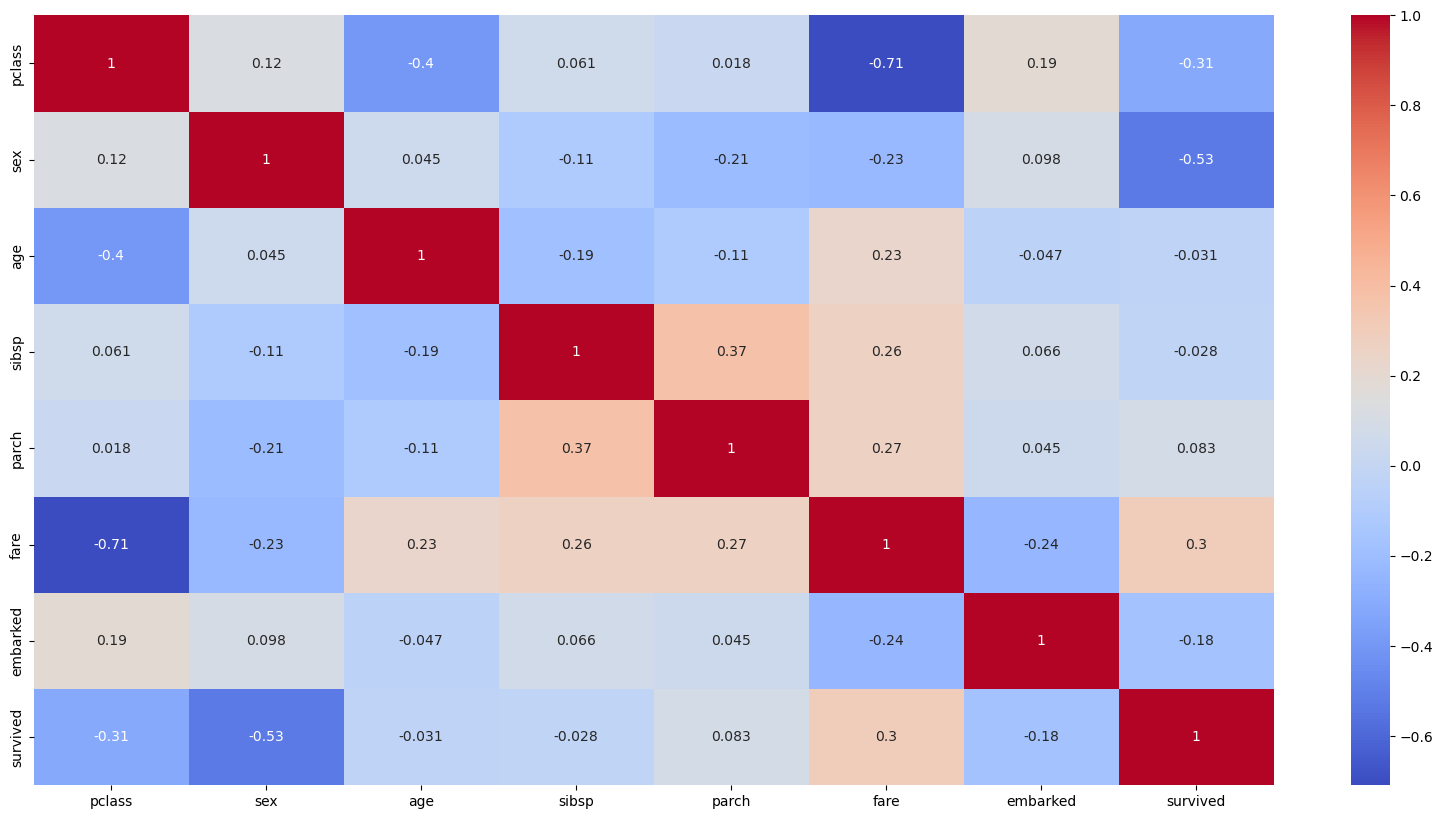

In [48]:
plt.show()

In [49]:
count = df["survived"].value_counts()
count


survived
0    809
1    500
Name: count, dtype: int64

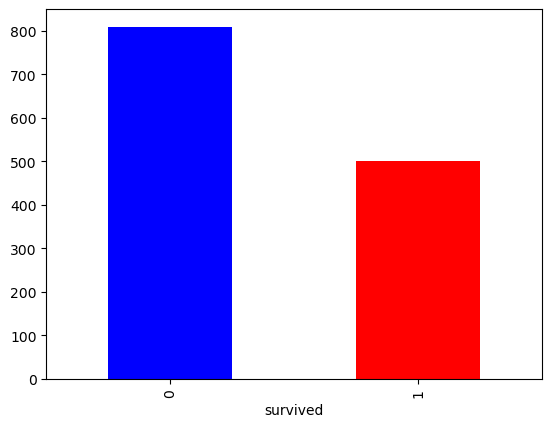

In [50]:
count.plot(kind='bar',color=["blue","red"])
plt.show()

# SURVIVED BY AGE

In [51]:
plt.figure(figsize=(10,7))
sns.histplot(data = df, x = 'age', hue='survived')
plt.title("survivence presence with age")

Text(0.5, 1.0, 'survivence presence with age')

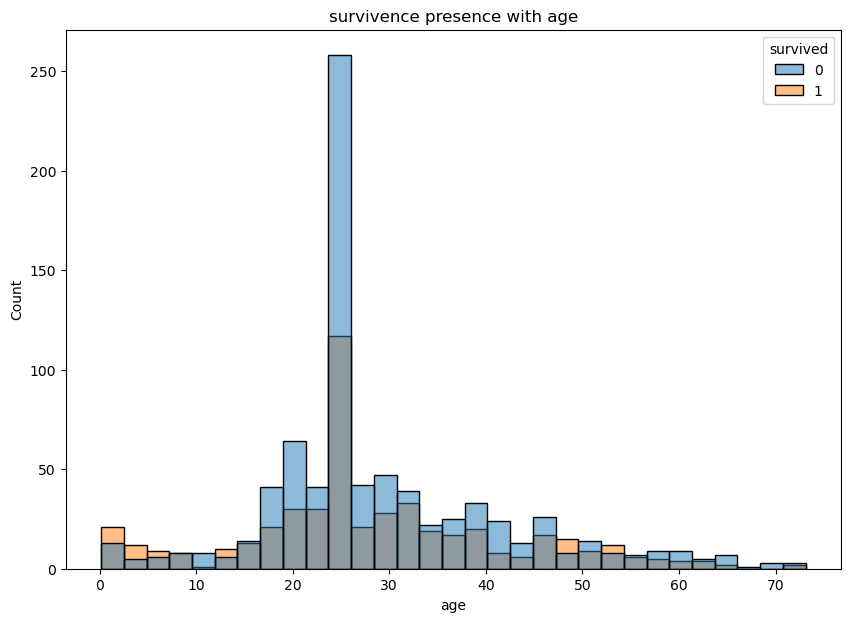

In [52]:
plt.show()

# GENDER V/S SURVIVED

In [53]:
plt.figure(figsize=(7,5))
sns.countplot(data = df, x = 'survived', hue = 'sex')
plt.title("passenger survived v/s gender")

Text(0.5, 1.0, 'passenger survived v/s gender')

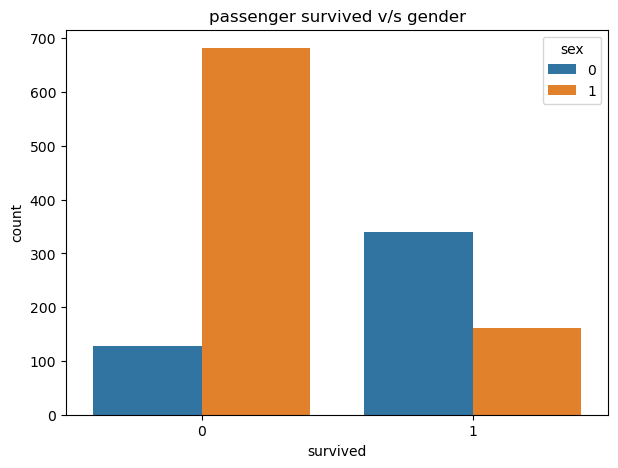

In [54]:
plt.show()

# SURVIVED ACCORDING TO NO.OF SIBLINGS COUNT


In [55]:
plt.figure(figsize=(7,5))
sns.countplot(data = df, x = 'survived', hue = 'sibsp')
plt.title("passenger survived v/s sibsp")

Text(0.5, 1.0, 'passenger survived v/s sibsp')

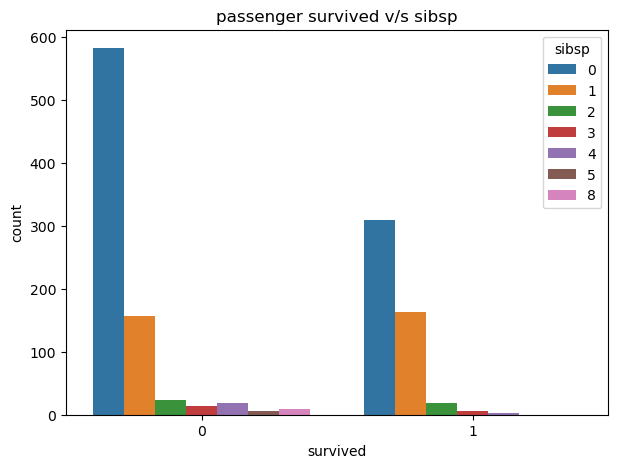

In [56]:
plt.show()

# SURVIVED BY TICKET CLASS

In [57]:
plt.figure(figsize=(7,5))
sns.countplot(data = df, x = 'survived', hue = 'pclass')
plt.title("passenger survived v/s pclass")

Text(0.5, 1.0, 'passenger survived v/s pclass')

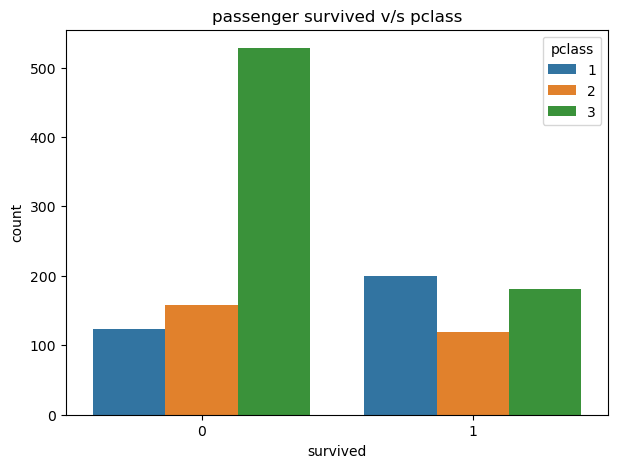

In [58]:
plt.show()

# SURVIVED NY PASSENGER FARE

In [59]:
plt.figure(figsize=(7,5))
sns.histplot(data=df, x='fare', hue='survived')


<Axes: xlabel='fare', ylabel='Count'>

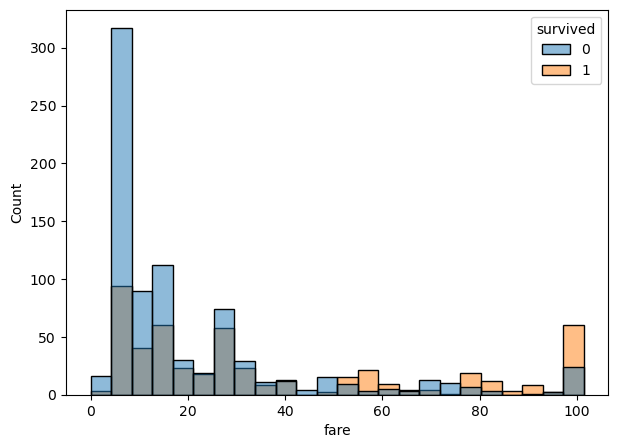

In [60]:
plt.show()

# label encoding

In [61]:
df.dtypes

pclass        int64
sex           int32
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int32
survived      int64
dtype: object

In [62]:
df.head()

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,1,0,29.0000,0,0,101.4126,2,1
1,1,1,0.9167,1,2,101.4126,2,1
2,1,0,2.0000,1,2,101.4126,2,0
3,1,1,30.0000,1,2,101.4126,2,0
4,1,0,25.0000,1,2,101.4126,2,0


# machine learning

In [63]:
df

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,1,0,29.0000,0,0,101.4126,2,1
1,1,1,0.9167,1,2,101.4126,2,1
2,1,0,2.0000,1,2,101.4126,2,0
3,1,1,30.0000,1,2,101.4126,2,0
4,1,0,25.0000,1,2,101.4126,2,0
...,...,...,...,...,...,...,...,...
1304,3,0,14.5000,1,0,14.4542,0,0
1305,3,0,24.0000,1,0,14.4542,0,0
1306,3,1,26.5000,0,0,7.2250,0,0
1307,3,1,27.0000,0,0,7.2250,0,0


In [64]:
x=df.drop(["survived"],axis=1)
x

,pclass,sex,age,sibsp,parch,fare,embarked
0,1,0,29.0000,0,0,101.4126,2
1,1,1,0.9167,1,2,101.4126,2
2,1,0,2.0000,1,2,101.4126,2
3,1,1,30.0000,1,2,101.4126,2
4,1,0,25.0000,1,2,101.4126,2
...,...,...,...,...,...,...,...
1304,3,0,14.5000,1,0,14.4542,0
1305,3,0,24.0000,1,0,14.4542,0
1306,3,1,26.5000,0,0,7.2250,0
1307,3,1,27.0000,0,0,7.2250,0


In [65]:
y=suv
y

0       1
1       1
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: survived, Length: 1309, dtype: int64

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=150)

In [67]:
x_train

,pclass,sex,age,sibsp,parch,fare,embarked
248,1,1,33.0,0,0,26.5500,2
2,1,0,2.0,1,2,101.4126,2
377,2,0,8.0,0,2,26.2500,2
126,1,1,37.0,1,0,53.1000,2
1158,3,0,41.0,0,2,20.2125,2
...,...,...,...,...,...,...,...
306,1,1,54.0,0,1,77.2875,2
496,2,1,30.0,0,0,13.0000,2
25,1,1,25.0,0,0,26.0000,0
442,2,1,24.0,2,0,73.5000,2


In [68]:
x_test

,pclass,sex,age,sibsp,parch,fare,embarked
486,2,1,24.0,0,0,10.5000,2
1181,3,1,24.0,0,0,9.3250,2
1261,3,0,63.0,0,0,9.5875,2
541,2,0,8.0,1,1,26.0000,2
1018,3,1,24.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
649,3,1,23.0,0,0,7.0500,2
360,2,1,26.0,1,1,29.0000,2
230,1,0,30.0,0,0,93.5000,2
1275,3,1,16.0,2,0,18.0000,2


In [69]:
y_train

248     0
2       0
377     1
126     0
1158    0
       ..
306     0
496     0
25      0
442     0
1252    0
Name: survived, Length: 785, dtype: int64

In [70]:
y_test

486     0
1181    0
1261    1
541     1
1018    0
       ..
649     0
360     1
230     1
1275    0
843     0
Name: survived, Length: 524, dtype: int64

In [71]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((785, 7), (524, 7), (785,), (524,))

# 1.logistic regression

In [72]:
from sklearn.linear_model import LogisticRegression 
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [73]:
lg_p=lg.predict(x_test)
lg_p

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,

In [74]:
from sklearn.metrics import confusion_matrix
l_m=confusion_matrix(lg_p,y_test)
l_m

array([[279,  60],
       [ 45, 140]], dtype=int64)

In [75]:
lg_acc=l_m.diagonal().sum()/l_m.sum()*100
lg_acc

79.9618320610687

In [76]:
lg_pr=precision_score(lg_p,y_test)
lg_pr

0.7

In [77]:
lg_re=recall_score(lg_p,y_test)
lg_re

0.7567567567567568

In [78]:
from sklearn.metrics import classification_report
print(classification_report(lg_p,y_test))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       339
           1       0.70      0.76      0.73       185

    accuracy                           0.80       524
   macro avg       0.78      0.79      0.78       524
weighted avg       0.80      0.80      0.80       524



# 2.Decision tree

In [79]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [80]:
dt_p=dt.predict(x_test)
dt_p

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,

In [81]:
dt_cf=confusion_matrix(dt_p,y_test)
dt_cf

array([[271,  79],
       [ 53, 121]], dtype=int64)

In [82]:
dt_ac=dt_cf.diagonal().sum()/dt_cf.sum()*100
dt_ac

74.80916030534351

In [83]:
from sklearn.metrics import classification_report
print(classification_report(dt_p,y_test))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80       350
           1       0.60      0.70      0.65       174

    accuracy                           0.75       524
   macro avg       0.72      0.73      0.73       524
weighted avg       0.76      0.75      0.75       524



# 3.Random forest

In [84]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [85]:
rf_p=rf.predict(x_test)
rf_p

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,

In [86]:
cf=confusion_matrix(rf_p,y_test)
cf

array([[278,  68],
       [ 46, 132]], dtype=int64)

In [87]:
rf_acc=cf.diagonal().sum()/cf.sum()*100
rf_acc

78.2442748091603

In [88]:
rf_pr=precision_score(rf_p,y_test)
rf_pr

0.66

In [89]:
rf_re=recall_score(rf_p,y_test)
rf_re

0.7415730337078652

In [90]:
print(classification_report(rf_p,y_test))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       346
           1       0.66      0.74      0.70       178

    accuracy                           0.78       524
   macro avg       0.76      0.77      0.76       524
weighted avg       0.79      0.78      0.79       524



# 4.K-Nearest Neighbor(KNN)

In [91]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=24)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=24)

In [92]:
k_p=knn.predict(x_test)
k_p

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,

In [93]:
ck=confusion_matrix(k_p,y_test)
ck

array([[278, 117],
       [ 46,  83]], dtype=int64)

In [94]:
kacc=ck.diagonal().sum()/ck.sum()*100
kacc

68.89312977099237

In [95]:
k_pr=precision_score(k_p,y_test)
k_pr

0.415

In [96]:
k_re=recall_score(k_p,y_test)
k_re

0.6434108527131783

In [97]:
print(classification_report(k_p,y_test))

              precision    recall  f1-score   support

           0       0.86      0.70      0.77       395
           1       0.41      0.64      0.50       129

    accuracy                           0.69       524
   macro avg       0.64      0.67      0.64       524
weighted avg       0.75      0.69      0.71       524



In [98]:
lst=list()
lst

[]

In [99]:
for i in range (1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    kn_pred=knn.predict(x_test)
    cf_k=confusion_matrix(kn_pred,y_test)
    acckn=cf_k.diagonal().sum()/cf_k.sum()*100
    lst.append(acckn)

In [100]:
import matplotlib.pyplot as plt
p=plt.plot(lst)

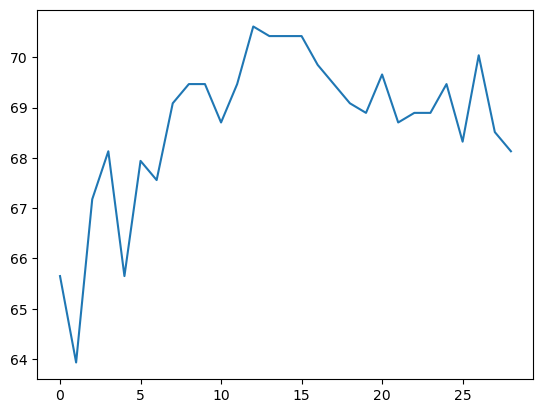

In [101]:
plt.show()

# 5.feature selection

In [102]:
dt.feature_importances_

array([0.09586072, 0.29261457, 0.25427076, 0.0698764 , 0.03593265,
       0.22086966, 0.03057522])

In [103]:
dt_df=pd.DataFrame({"Importance":list(dt.feature_importances_),"columns":list(x)})
dt_df

,Importance,columns
0,0.095861,pclass
1,0.292615,sex
2,0.254271,age
3,0.069876,sibsp
4,0.035933,parch
5,0.220870,fare
6,0.030575,embarked


In [104]:
dt_pr=precision_score(dt_p,y_test)
dt_pr

0.605

In [105]:
dt_re=recall_score(dt_p,y_test)
dt_re

0.6954022988505747

In [106]:
print(classification_report(dt_p,y_test))


              precision    recall  f1-score   support

           0       0.84      0.77      0.80       350
           1       0.60      0.70      0.65       174

    accuracy                           0.75       524
   macro avg       0.72      0.73      0.73       524
weighted avg       0.76      0.75      0.75       524



# SVM

In [108]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [109]:
s_p=svc.predict(x_test)
s_p

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,

In [110]:
cs=confusion_matrix(s_p,y_test)
cs

array([[297, 147],
       [ 27,  53]], dtype=int64)

In [111]:
acc_s=cs.diagonal().sum()/cs.sum()*100
acc_s

66.79389312977099

In [112]:
s_pr=precision_score(s_p,y_test)
s_pr

0.265

In [113]:
s_re=recall_score(s_p,y_test)
s_re

0.6625

In [114]:
print(classification_report(s_p,y_test))

              precision    recall  f1-score   support

           0       0.92      0.67      0.77       444
           1       0.27      0.66      0.38        80

    accuracy                           0.67       524
   macro avg       0.59      0.67      0.58       524
weighted avg       0.82      0.67      0.71       524



In [ ]:
MAKE DATAFRAME FOR COMPARE RESULT